In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [98]:
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [90]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [91]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [100]:
print(train_df.shape)
print(test_df.shape)

(2000, 21)
(1000, 21)


In [93]:
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
train_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [101]:
print(train_df.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [94]:
train_df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


# Exploratory data analysis (EDA)

<AxesSubplot:>

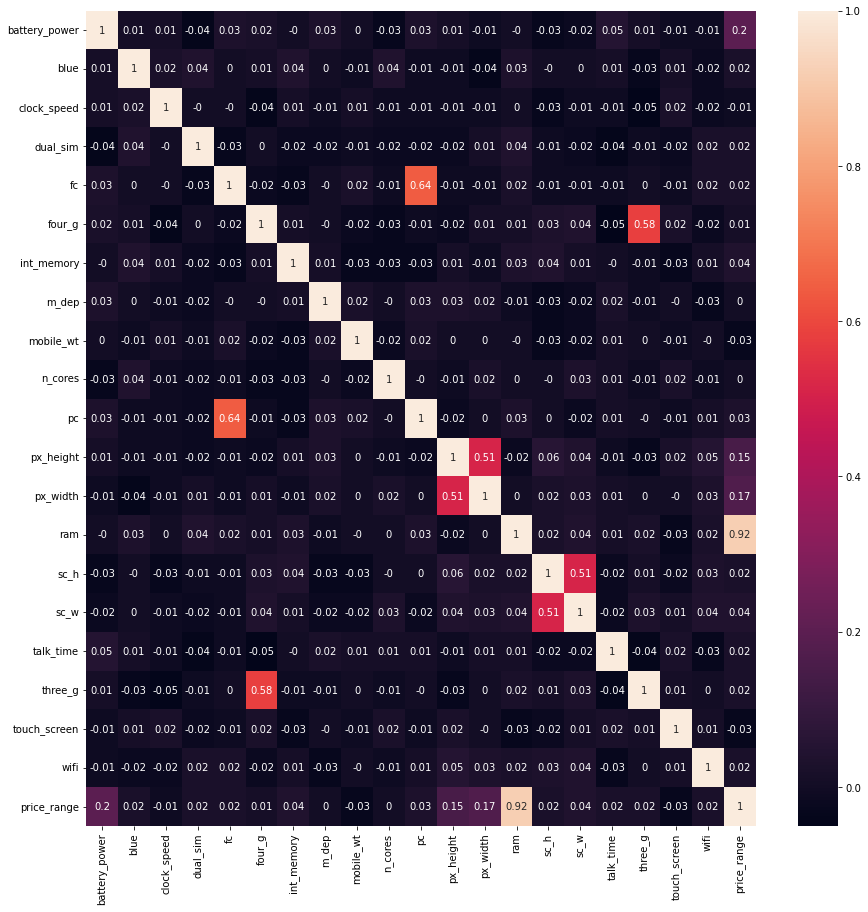

In [10]:

fig, ax = plt.subplots(1,1, figsize = (15,15))
sns.heatmap(np.round(train_df.corr(), 2), annot=True, ax = ax)


# Price range is related with Ram,px_width,px_height,battery_power

In [96]:
train_df[train_df['price_range']==0].count()

battery_power    500
blue             500
clock_speed      500
dual_sim         500
fc               500
four_g           500
int_memory       500
m_dep            500
mobile_wt        500
n_cores          500
pc               500
px_height        500
px_width         500
ram              500
sc_h             500
sc_w             500
talk_time        500
three_g          500
touch_screen     500
wifi             500
price_range      500
dtype: int64

[Text(0, 0, '500'), Text(0, 0, '500'), Text(0, 0, '500'), Text(0, 0, '500')]

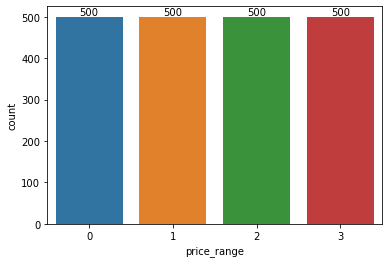

In [11]:
ax = sns.countplot(x = train_df['price_range'])
ax.bar_label(ax.containers[0])

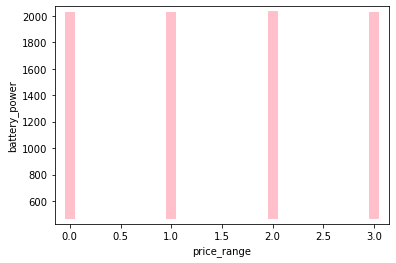

In [104]:
plt.scatter(train_df['price_range'],train_df['battery_power'], c ="pink",
            linewidths = 2,
            marker ="s",
            
            s = 50)
plt.xlabel("price_range")
plt.ylabel("battery_power")
plt.show()

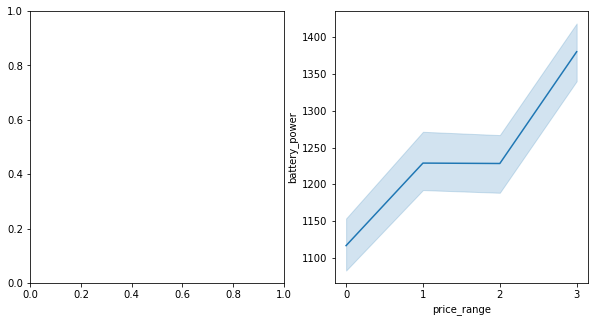

In [113]:

fig,ax = plt.subplots(1,2, figsize = (10,5))


sns.lineplot(x = train_df['price_range'], y = train_df['battery_power'], ax = ax[1])
ax[1].set_xticks([0, 1, 2, 3])


More the battery life of the phone more will be the price range
Price_range between 1 and 2 have majorly same battery_powers

<AxesSubplot:xlabel='blue', ylabel='price_range'>

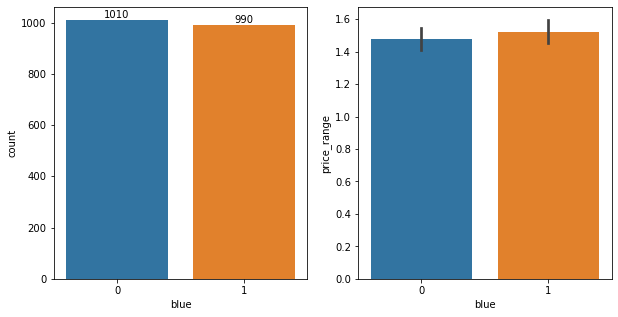

In [21]:

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.countplot(x = train_df['blue'], ax = ax[0])
ax[0].bar_label(ax[0].containers[0])
sns.barplot(x = train_df['blue'], y = train_df['price_range'])


More than half of the mobiles dont have bluetooth
The ones with bluetooth have little higher price range than the other ones

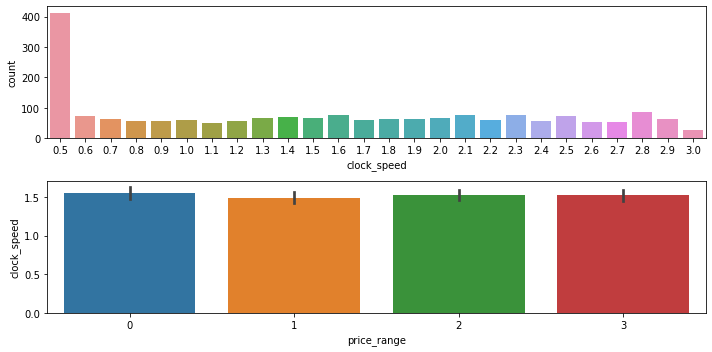

In [116]:
fig, ax = plt.subplots(2,1, figsize = (10, 5))
sns.countplot(x = train_df['clock_speed'], ax = ax[0])
sns.barplot(x = train_df['price_range'], y = train_df['clock_speed'], ax = ax[1])
ax[1].set_xticks([0,1,2,3])
plt.tight_layout()

Most of the phones have low clock speed and are slow
According to data price dont affect on basis of clock speed they are somewhat same


[Text(0, 0, '981'), Text(0, 0, '1019')]

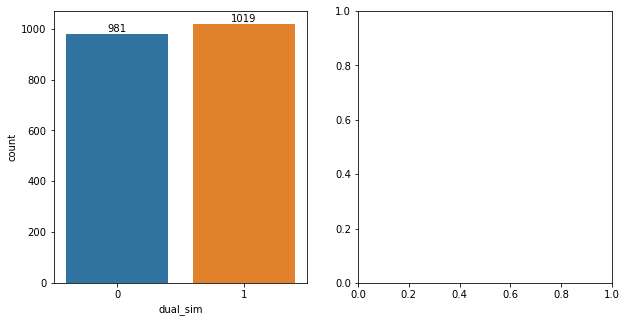

In [28]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.countplot(x = train_df['dual_sim'], ax = ax[0])
ax[0].bar_label(ax[0].containers[0])



In [30]:
sns.barplot(x = train_df['dual_sim'], y = train_df['price_range'], ax = ax[1])

<AxesSubplot:xlabel='dual_sim', ylabel='price_range'>

In [31]:
ax[1].set_xticks([0,1], ['No', 'Yes']

SyntaxError: unexpected EOF while parsing (4160075468.py, line 1)

Half of the phones do not have dual sim
According to data price dont affect whether phone has a dual sim or not but there is a slight high price for dual sim

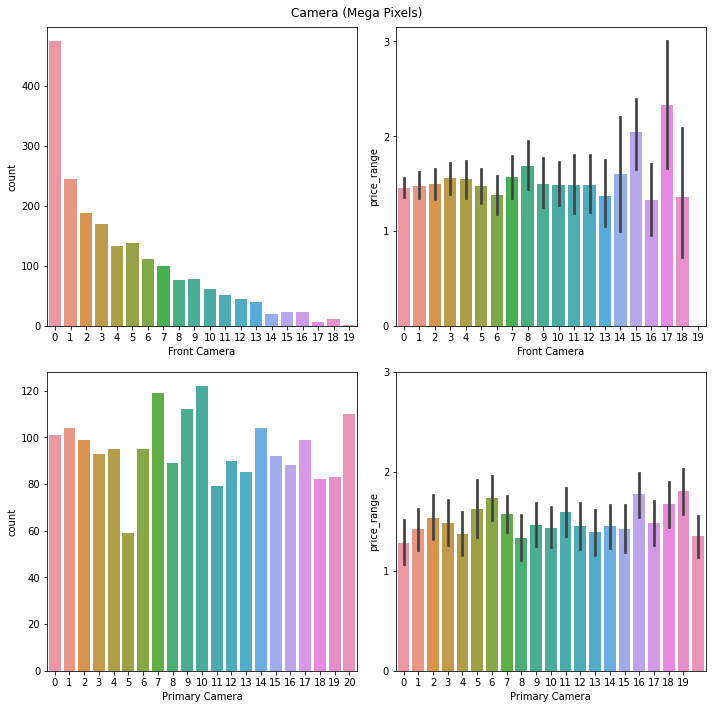

In [121]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
sns.countplot(x = train_df['fc'], ax = ax[0][0])
ax[0][0].set_xlabel("Front Camera")
sns.barplot(x = train_df['fc'], y = train_df['price_range'],ax = ax[0][1])
ax[0][1].set_xticks(np.arange(0, 20))
ax[0][1].set_yticks([0, 1, 2, 3])
ax[0][1].set_xlabel("Front Camera")
sns.countplot(x = train_df['pc'], ax = ax[1][0])
ax[1][0].set_xlabel("Primary Camera")
sns.barplot(x = train_df['pc'], y = train_df['price_range'],ax = ax[1][1])
ax[1][1].set_xticks(np.arange(0, 20))
ax[1][1].set_yticks([0, 1, 2, 3])
ax[1][1].set_xlabel("Primary Camera")
fig.suptitle("Camera (Mega Pixels)")
plt.tight_layout()

Around 400+ mobiles don't have front camera and there are very few mobiles with high pixel front cameras
Around 100 mobiles dont't have primary camera and the highest primary camera pixel is 20
According to data Price range is not affected by the camera pixels.

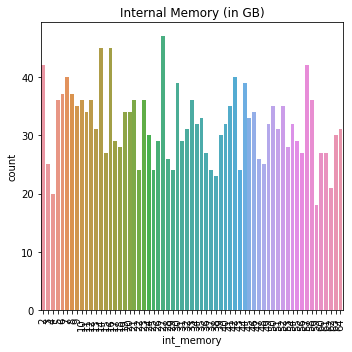

In [123]:
plt.figure(figsize=(5,5))
sns.countplot(x = train_df['int_memory'])
plt.xticks(rotation = 90)
plt.title("Internal Memory (in GB)")
plt.tight_layout()

more than 100 Phones have 27GB, 14GB, 16GB of int memory
Around 100 phones have less then 5GB of int memory
Highest int memory is of 64GB  around more than 25 phones

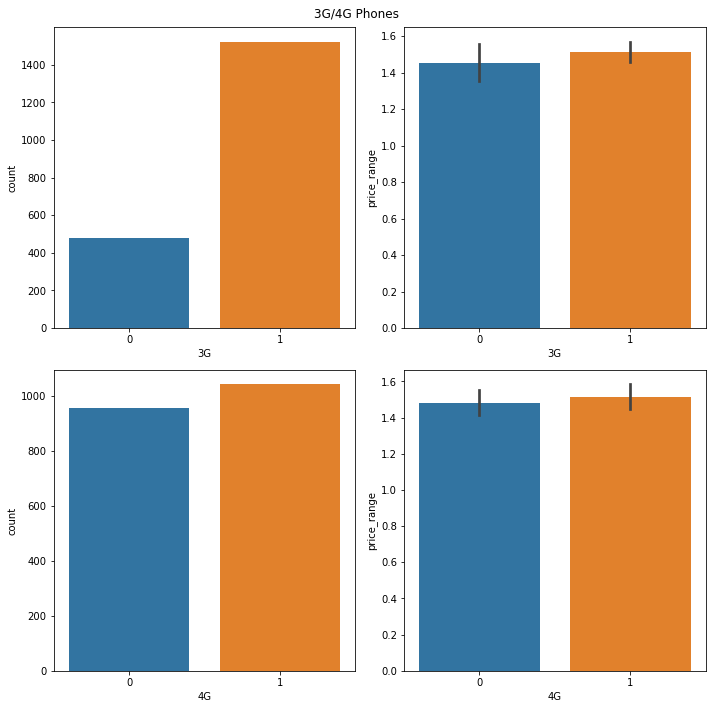

In [35]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
sns.countplot(x = train_df['three_g'], ax = ax[0][0])
ax[0][0].set_xlabel("3G")
sns.barplot(x = train_df['three_g'], y = train_df['price_range'],ax = ax[0][1])
ax[0][1].set_xlabel("3G")
sns.countplot(x = train_df['four_g'], ax = ax[1][0])
ax[1][0].set_xlabel("4G")
sns.barplot(x = train_df['four_g'], y = train_df['price_range'],ax = ax[1][1])
ax[1][1].set_xlabel("4G")
fig.suptitle("3G/4G Phones")
plt.tight_layout()

1. More than Half of the phones have 3G facality and have a slight high price than the ones which do not have it
2. Half of the phones don't have 4G facality same as 3G slight change in price

In [39]:
len(train_df.int_memory)

2000

In [42]:
train_df['int_memory'].value_counts()

27    47
16    45
14    45
2     42
57    42
      ..
25    24
38    23
62    21
4     20
59    18
Name: int_memory, Length: 63, dtype: int64

C:\Users\monty python\anaconda3\envs\Shivam\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Mobile Depth (in cm)')

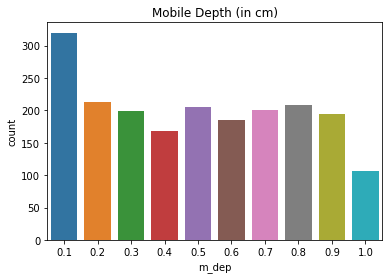

In [45]:
sns.countplot(train_df['m_dep'])
plt.title("Mobile Depth (in cm)")


1. 300+ mobiles have 1mm of Depth
2. 100+ mobiles have 10mm of Depth
3. 400+ mobiles have depth between 2mm-9mm

C:\Users\monty python\anaconda3\envs\Shivam\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='n_cores', ylabel='count'>

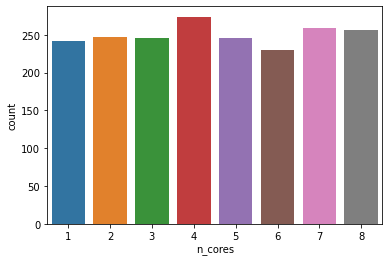

In [51]:
sns.countplot(train_df['n_cores'])


1. We have Mobile phones cores ranging between 1-8
2. Mobiles with 4 core is slight high around 250+

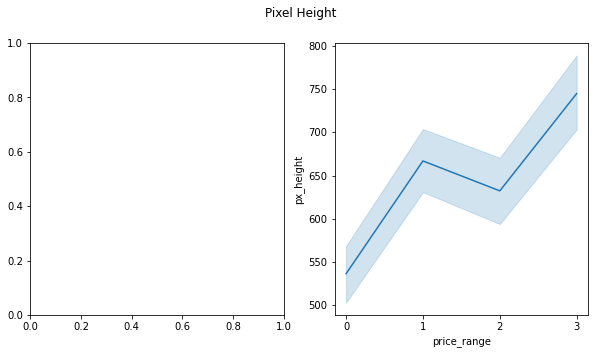

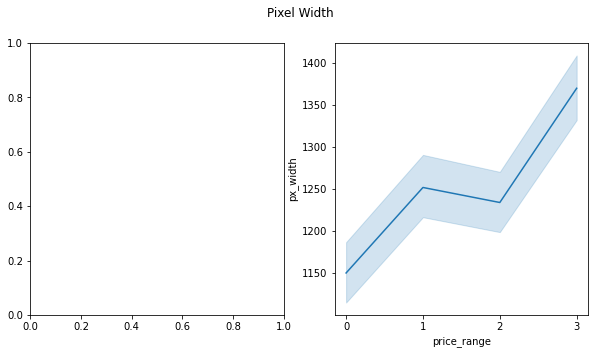

In [54]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
fig.suptitle("Pixel Height")
#sns.barplot(x = train_df['price_range'], y = train_df['px_height'], ax = ax[0])
sns.lineplot(x = train_df['price_range'], y = train_df['px_height'], ax = ax[1])
ax[1].set_xticks([0,1,2,3])
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
fig.suptitle("Pixel Width")
#sns.barplot(x = train_df['price_range'], y = train_df['px_width'], ax = ax[0])
sns.lineplot(x = train_df['price_range'], y = train_df['px_width'], ax = ax[1])
ax[1].set_xticks([0,1,2,3])
ax[1].set_xticks([0,1,2,3])

1. With increase of pixel Height and width the price also increases



C:\Users\monty python\anaconda3\envs\Shivam\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\monty python\anaconda3\envs\Shivam\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '')

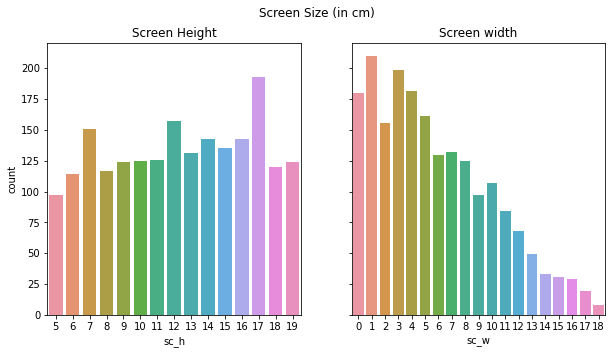

In [56]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5), sharey=True)
fig.suptitle("Screen Size (in cm)")
sns.countplot(train_df['sc_h'], ax = ax[0])
ax[0].set_title("Screen Height")
sns.countplot(train_df['sc_w'], ax = ax[1])
ax[1].set_title("Screen width")
ax[1].set_ylabel("")

. Screen width ranges between 0cm-18cm (But width cannot be zero so this are the wrong data so we need to remove this)


In [58]:
#Removing the rows which have 0 screen width
train_data = train_df[~(train_df['sc_w'] == 0)]


In [59]:
test_data = test_df[~((test_df['sc_w'] == 0) | (test_df['px_height'] == 0))]

Text(0.5, 0.98, 'Touch Screen facility')

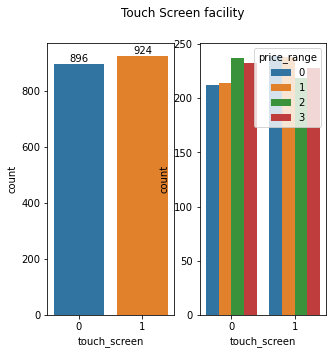

In [124]:
fig, ax = plt.subplots(1, 2, figsize = (5, 5))
sns.countplot(x = train_data['touch_screen'], ax = ax[0])
ax[0].bar_label(ax[0].containers[0])
sns.countplot(x = train_data['touch_screen'], hue = train_data['price_range'])
fig.suptitle("Touch Screen facility")

1. More than half of the phones dont have touch screen facality
2. The ones with not having touch screen facality have high number of phones between price_range of 2-3
3. And ones having touch screen facality have low number of phones between price_range between 2-3


Text(0.5, 0.98, 'WIFI facility')

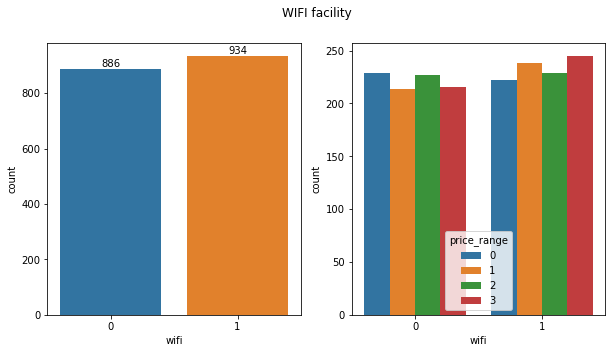

In [61]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.countplot(x = train_data['wifi'], ax = ax[0])
ax[0].bar_label(ax[0].containers[0])
sns.countplot(x = train_data['wifi'], hue = train_data['price_range'])
fig.suptitle("WIFI facility")

1. More than half of the phones dont have wifi facility
2. Price ranges are same for the phones not having wifi facility
3. Price ranges are slightly increasing with wifi facility

In [65]:

#Applying minmaxscaler on columns with more than 10 discrete values
minmaxscaler = MinMaxScaler()
columns = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt',
 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
train_data[columns] = minmaxscaler.fit_transform(train_data[columns])
#Same for testing columns
test_data[columns] = minmaxscaler.transform(test_data[columns])

C:\Users\monty python\AppData\Local\Temp\ipykernel_14260\3664602353.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[columns] = minmaxscaler.fit_transform(train_data[columns])
C:\Users\monty python\anaconda3\envs\Shivam\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\monty python\AppData\Local\Temp\ipykernel_14260\3664602353.py:7: SettingWithCopyWarning: 
A value is trying to be se

In [66]:
X, y = train_data.drop(columns=['price_range']), train_data['price_range']
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3,random_state=42)


In [67]:
print(f'X_train: - {x_train.shape}\nX_test: - {x_val.shape}')

X_train: - (1274, 20)
X_test: - (546, 20)


In [125]:
from sklearn.linear_model import LogisticRegression



from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [127]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  classification_report,accuracy_score,f1_score, confusion_matrix

In [72]:
res = {'Model':[], 'Accuracy':[], 'CV Score':[]}
def metrics(train_predicts, test_predicts, model, ensemble = False, name = ''):
 fig, ax = plt.subplots(1,2, figsize = (10,5))
 fig.suptitle(name)
 print("*"*50)
 print(f'Train Accuracy: - {np.round(accuracy_score(train_predicts, y_train), 2)*100}%')
 print(f'Test Accuracy: - {np.round(accuracy_score(test_predicts, y_val), 2)*100}%')
 print(f'\n**********Classification Report**********\n\n')
 print(classification_report(y_val, test_predicts))
 
 cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
 print(f'**********Cross Validation**********\n\n')
 print(pd.Series(cv_scores))
 print(f'\n\nMean Score: - {np.mean(cv_scores)}\n')
 matrix = confusion_matrix(test_predicts, y_val)
 sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", ax = ax[0])
 
 if ensemble == True:
        temp = pd.DataFrame(
        model.feature_importances_,
        index=x_train.columns, columns=['Features']).sort_values('Features', ascending=True)
        ax[1].barh(temp.index, temp['Features'])
        
 
 
 res['Model'].append(name)
 res['Accuracy'].append(np.round(accuracy_score(test_predicts, y_val), 2)*100)
 res['CV Score'].append(np.round(np.mean(cv_scores), 2))
 
 plt.tight_layout()



# logistic regression

In [73]:
param_grid = {
 'C': [0.1, 1.0, 10.0, 100], # Regularization parameter
 'penalty': ['l1', 'l2',None], # Regularization type
 'solver': ['liblinear', 'saga'], # Solver algorithm
 'max_iter': [100, 200, 300, 400, 500] # Maximum number of iterations
}
scoring = 'accuracy'
grid_search_logistic = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring=scoring, cv=5, n_jobs=-1)
grid_search_logistic.fit(x_train, y_train)

C:\Users\monty python\anaconda3\envs\Shivam\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
200 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\monty python\anaconda3\envs\Shivam\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\monty python\anaconda3\envs\Shivam\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\monty python\anaconda3\envs\Shivam\lib\site-packages\sklearn\li

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1.0, 10.0, 100],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2', None],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [74]:
grid_search_logistic.best_estimator_


LogisticRegression(C=10.0, max_iter=400, penalty='l1', solver='saga')

**************************************************
Train Accuracy: - 98.0%
Test Accuracy: - 97.0%

**********Classification Report**********


              precision    recall  f1-score   support

           0       0.98      0.97      0.98       133
           1       0.95      0.97      0.96       144
           2       0.97      0.94      0.95       142
           3       0.96      0.99      0.98       127

    accuracy                           0.97       546
   macro avg       0.97      0.97      0.97       546
weighted avg       0.97      0.97      0.97       546



C:\Users\monty python\anaconda3\envs\Shivam\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\monty python\anaconda3\envs\Shivam\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\monty python\anaconda3\envs\Shivam\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\monty python\anaconda3\envs\Shivam\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\monty python\anaconda3\envs\Shivam\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**********Cross Validation**********


0    0.972527
1    0.961538
2    0.975275
3    0.972527
4    0.972527
dtype: float64


Mean Score: - 0.9708791208791208



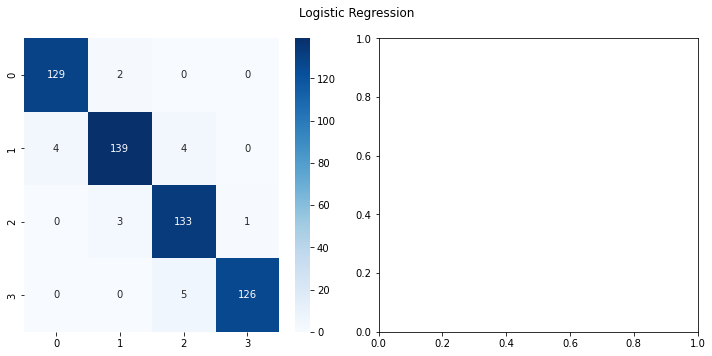

In [75]:
model_logistic = grid_search_logistic.best_estimator_
metrics(model_logistic.predict(x_train), model_logistic.predict(x_val),model=model_logistic, name='Logistic Regression')



# SVC

In [76]:
param_grid_svm = {'C':[1, 10, 25, 50, 100],
 'kernel':['linear', 'poly', 'rbf', 'sigmoid'],}
grid_svm_CV = GridSearchCV(estimator=SVC(probability=True), param_grid=param_grid_svm, n_jobs=-1, scoring='accuracy', cv=5)
grid_svm_CV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1, 10, 25, 50, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

**************************************************
Train Accuracy: - 98.0%
Test Accuracy: - 97.0%

**********Classification Report**********


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       133
           1       0.96      0.97      0.96       144
           2       0.96      0.94      0.95       142
           3       0.95      0.98      0.97       127

    accuracy                           0.97       546
   macro avg       0.97      0.97      0.97       546
weighted avg       0.97      0.97      0.97       546

**********Cross Validation**********


0    0.961538
1    0.964286
2    0.972527
3    0.969780
4    0.967033
dtype: float64


Mean Score: - 0.9670329670329669



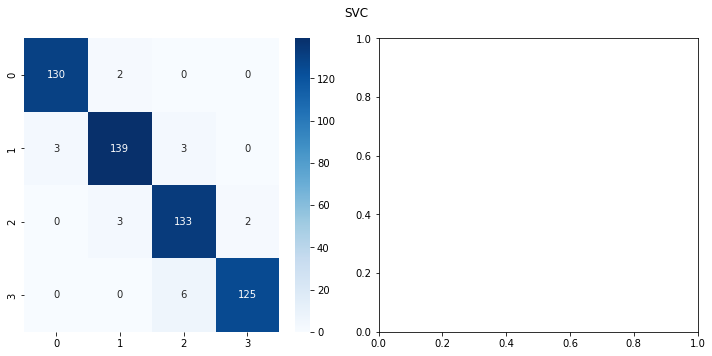

In [77]:
model_svc = grid_svm_CV.best_estimator_
metrics(model_svc.predict(x_train), model_svc.predict(x_val), model = model_svc, name = 'SVC')

# Naive Bayes

**************************************************
Train Accuracy: - 81.0%
Test Accuracy: - 79.0%

**********Classification Report**********


              precision    recall  f1-score   support

           0       0.92      0.92      0.92       133
           1       0.75      0.67      0.71       144
           2       0.66      0.70      0.68       142
           3       0.84      0.89      0.87       127

    accuracy                           0.79       546
   macro avg       0.79      0.79      0.79       546
weighted avg       0.79      0.79      0.79       546

**********Cross Validation**********


0    0.788462
1    0.818681
2    0.813187
3    0.780220
4    0.785714
dtype: float64


Mean Score: - 0.7972527472527473



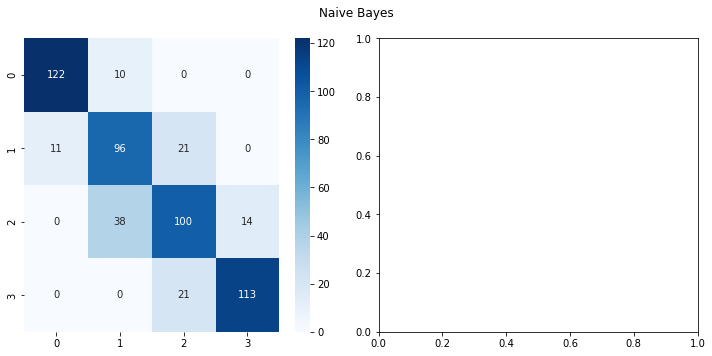

In [82]:
model_nb = GaussianNB().fit(x_train, y_train)
metrics(model_nb.predict(x_train), model_nb.predict(x_val), model=model_nb, name = 'Naive Bayes')


# Comparing Accuracy of different model used

In [83]:

compare_model = pd.DataFrame(res)
compare_model.set_index('Model', inplace=True)
compare_model

,Accuracy,CV Score
Model,,
Logistic Regression,97.0,0.97
SVC,97.0,0.97
Naive Bayes,79.0,0.80
Naive Bayes,79.0,0.80


# Best accuracy is given by both logistic and SVC model

Fitting all the training data on the models and predicting the test data Price Range

In [84]:
model_logistic.fit(X, y)
model_svc.fit(X, y)
model_nb.fit(X, y)


C:\Users\monty python\anaconda3\envs\Shivam\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GaussianNB()

In [85]:
id = test_data['id']
test_data.drop(columns=['id'], inplace=True)

C:\Users\monty python\anaconda3\envs\Shivam\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [87]:
final = pd.DataFrame({'ID':id,
 'Price_Range_Logistic':model_logistic.predict(test_data),
 
 
 'Price_Range_SVC':model_svc.predict(test_data),
 'Price_Range_NVB':model_nb.predict(test_data)})

final.set_index('ID', inplace=True)

In [88]:
final.head()


,Price_Range_Logistic,Price_Range_SVC,Price_Range_NVB
ID,,,
1,3,3,3
3,2,2,2
5,1,1,1
6,3,3,3
7,3,3,3
